Data : `trumptweets_data.csv`
### Task 1

Cluster data from the `trumptweets_data.csv` file using KMeans and DBSCAN.

    a)	Exclude columns A and B from the set;
    b)	Find the optimal K number for the K Means algorithm;
    c)	Calculate the mean of the variables for each cluster according to DBSCAN and KMeans;

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df_all = pd.read_csv('datasets/trumptweets_data.csv', sep=';', decimal=',')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41121 entries, 0 to 41120
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   A             41121 non-null  object 
 1   B             0 non-null      float64
 2   WC            41121 non-null  int64  
 3   Analytic      41121 non-null  float64
 4   Clout         41121 non-null  float64
 5   Authentic     41121 non-null  float64
 6   Tone          41121 non-null  float64
 7   WPS           41121 non-null  float64
 8   Sixltr        41121 non-null  float64
 9   Dic           41121 non-null  float64
 10  function      41121 non-null  float64
 11  pronoun       41121 non-null  float64
 12  ppron         41121 non-null  float64
 13  i             41121 non-null  float64
 14  we            41121 non-null  float64
 15  you           41121 non-null  float64
 16  shehe         41121 non-null  float64
 17  they          41121 non-null  float64
 18  ipron         41121 non-nu

In [3]:
df_all.head(3)

,A,B,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Be sure to tune in and watch Donald Trump on L...,NaN,23,98.23,66.81,54.89,93.61,23.0,13.04,73.91,...,0.0,0.0,0.0,0.0,4.35,0.0,0.0,0.0,0.0,0.0
1,Donald Trump will be appearing on The View tom...,NaN,22,96.54,81.84,31.94,94.75,22.0,31.82,90.91,...,0.0,0.0,0.0,0.0,4.55,0.0,0.0,0.0,0.0,0.0
2,Donald Trump reads Top Ten Financial Tips on L...,NaN,20,96.79,50.00,15.86,96.76,20.0,15.00,50.00,...,0.0,5.0,0.0,0.0,5.00,5.0,0.0,0.0,0.0,10.0


Ad. a)

We drop columns with strings or unnecessary informations

In [4]:
df = df_all[df_all.columns.difference(["A",'B'])]
df.apply(pd.to_numeric)
df.head()

,AllPunc,Analytic,Apostro,Authentic,Clout,Colon,Comma,Dash,Dic,Exclam,...,social,space,swear,tentat,they,time,verb,we,work,you
0,4.35,98.23,0.0,54.89,66.81,0.00,0.0,0.0,73.91,4.35,...,4.35,13.04,0.0,0.00,0.0,13.04,4.35,0.0,0.00,0.0
1,4.55,96.54,0.0,31.94,81.84,0.00,0.0,0.0,90.91,4.55,...,9.09,4.55,0.0,4.55,0.0,13.64,13.64,0.0,13.64,0.0
2,30.00,96.79,0.0,15.86,50.00,5.00,0.0,5.0,50.00,5.00,...,0.00,10.00,0.0,0.00,0.0,5.00,0.00,0.0,5.00,0.0
3,29.41,97.21,0.0,99.00,50.00,11.76,0.0,0.0,76.47,0.00,...,0.00,5.88,0.0,0.00,0.0,11.76,5.88,0.0,17.65,0.0
4,35.00,25.89,5.0,74.76,2.31,0.00,0.0,15.0,65.00,0.00,...,5.00,5.00,0.0,0.00,5.0,5.00,15.00,0.0,0.00,0.0


In [5]:
print(df.columns)

Index(['AllPunc', 'Analytic', 'Apostro', 'Authentic', 'Clout', 'Colon',
       'Comma', 'Dash', 'Dic', 'Exclam', 'OtherP', 'Parenth', 'Period',
       'QMark', 'Quote', 'SemiC', 'Sixltr', 'Tone', 'WC', 'WPS', 'achieve',
       'adj', 'adverb', 'affect', 'affiliation', 'anger', 'anx', 'article',
       'assent', 'auxverb', 'bio', 'body', 'cause', 'certain', 'cogproc',
       'compare', 'conj', 'death', 'differ', 'discrep', 'drives', 'family',
       'feel', 'female', 'filler', 'focusfuture', 'focuspast', 'focuspresent',
       'friend', 'function', 'health', 'hear', 'home', 'i', 'informal',
       'ingest', 'insight', 'interrog', 'ipron', 'leisure', 'male', 'money',
       'motion', 'negate', 'negemo', 'netspeak', 'nonflu', 'number', 'percept',
       'posemo', 'power', 'ppron', 'prep', 'pronoun', 'quant', 'relativ',
       'relig', 'reward', 'risk', 'sad', 'see', 'sexual', 'shehe', 'social',
       'space', 'swear', 'tentat', 'they', 'time', 'verb', 'we', 'work',
       'you'],
      d

Ad. b)

#### Algorithm KMeans
##### Elbow Method for optimal k

* **Distortion**: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

* **Inertia**: It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k (e.g. from 1 to 30) and calculate the values of distortions for each value of k.

In [6]:
distortion = []

for k in range(1,30):
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    
    distortion.append(kmeans.inertia_)

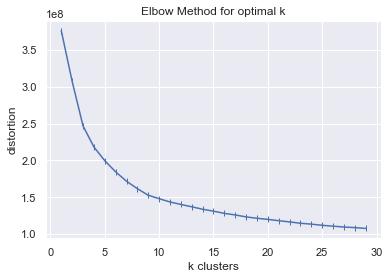

In [8]:
sns.set_theme()
plt.plot(range(1,30), distortion, 'b|-')
plt.xlabel('k clusters')
plt.ylabel('distortion')
plt.title('Elbow Method for optimal k')
plt.show()

At first sight, it looks like k=9 is the best one. Let's check it with less iterations.

In [9]:
distortion = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    distortion.append(kmeans.inertia_)

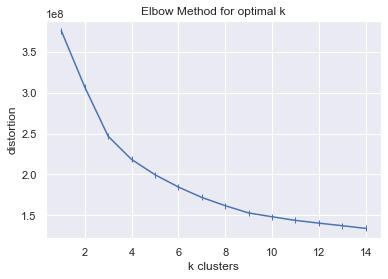

In [10]:
sns.set_theme()
plt.plot(range(1,15), distortion, 'b|-')
plt.xlabel('k clusters')
plt.ylabel('distortion')
plt.title('Elbow Method for optimal k')
plt.show()

Yes, let's take k=9.

Ad. c)

#### KMeans, k = 9

In [11]:
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=9, random_state=0)

In [12]:
df['cluster_KMeans'] = kmeans.labels_ #labels_ returns cluster assignments

<ipython-input-12-6b1ff5e1c3d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_KMeans'] = kmeans.labels_ #labels_ returns cluster assignments


In [13]:
df['cluster_KMeans'].unique()

array([7, 4, 3, 8, 6, 0, 2, 5, 1])

In [14]:
df.head(3)

,AllPunc,Analytic,Apostro,Authentic,Clout,Colon,Comma,Dash,Dic,Exclam,...,space,swear,tentat,they,time,verb,we,work,you,cluster_KMeans
0,4.35,98.23,0.0,54.89,66.81,0.0,0.0,0.0,73.91,4.35,...,13.04,0.0,0.00,0.0,13.04,4.35,0.0,0.00,0.0,7
1,4.55,96.54,0.0,31.94,81.84,0.0,0.0,0.0,90.91,4.55,...,4.55,0.0,4.55,0.0,13.64,13.64,0.0,13.64,0.0,4
2,30.00,96.79,0.0,15.86,50.00,5.0,0.0,5.0,50.00,5.00,...,10.00,0.0,0.00,0.0,5.00,0.00,0.0,5.00,0.0,4


clusters numerosity

In [15]:
df['cluster_KMeans'].value_counts()

4    7100
0    6658
7    4813
3    4738
5    4382
2    4133
8    4078
6    3995
1    1224
Name: cluster_KMeans, dtype: int64

([<matplotlib.patches.Wedge at 0x22fc845b340>,
 [Text(0.9421018753769437, 0.5678415768603473, 'Cluster_4'),
  Text(-0.02499935618497641, 1.0997158870318902, 'Cluster_0'),
  Text(-0.8610429252246785, 0.6845473547684842, 'Cluster_7'),
  Text(-1.0981511664479786, -0.0637496323828162, 'Cluster_3'),
  Text(-0.8012922376434991, -0.753611803180042, 'Cluster_5'),
  Text(-0.18123941484985093, -1.0849664854293353, 'Cluster_2'),
  Text(0.4901086621816977, -0.9847809397294743, 'Cluster_8'),
  Text(0.96940561787733, -0.5198583922837757, 'Cluster_6'),
  Text(1.0951940295025049, -0.10271337664621306, 'Cluster_1')])

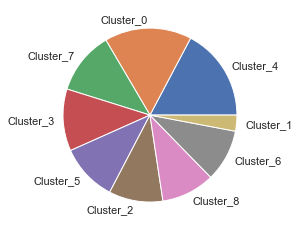

In [16]:
sns.set_theme()
plt.pie(df['cluster_KMeans'].value_counts(),labels = ["Cluster_4","Cluster_0","Cluster_7","Cluster_3","Cluster_5","Cluster_2","Cluster_8","Cluster_6","Cluster_1"])

#### KMeans (k=9) --> Means of the variables for each cluster

In [17]:
df.groupby(by='cluster_KMeans').mean()

,AllPunc,Analytic,Apostro,Authentic,Clout,Colon,Comma,Dash,Dic,Exclam,...,social,space,swear,tentat,they,time,verb,we,work,you
cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,27.901155,84.214718,1.470949,12.777513,67.992085,0.960641,2.935778,1.560302,73.043889,2.239623,...,8.543441,5.816068,0.181783,1.194168,0.724236,3.378234,13.496437,1.136163,4.307151,0.759752
1,200.625000,93.153317,0.000000,1.303938,50.113137,1.129984,0.065359,0.040850,0.925784,1.434534,...,0.077157,0.016340,0.000000,0.020425,0.000000,0.023832,0.237998,0.010212,0.266757,0.010212
2,76.375115,83.942625,1.061115,7.505959,74.609952,4.179018,2.089591,4.010682,53.595657,10.443165,...,9.764972,2.786738,0.035563,0.604837,0.043203,2.116603,10.088933,0.474496,3.078372,2.985427
3,33.943081,73.965405,2.092655,81.523455,47.221530,1.573369,3.030931,2.324181,75.329122,3.170087,...,5.804120,11.289519,0.169282,1.442484,0.497885,8.378717,14.454721,0.716456,3.539384,0.937136
4,30.331813,86.244735,1.097531,13.420879,73.847534,1.291849,2.913296,1.515996,74.347625,2.983777,...,9.415389,5.800100,0.028948,1.171421,0.426758,3.568403,12.597093,1.316580,4.421746,1.729985
5,42.176963,26.077992,2.592444,14.916632,75.105783,2.654032,3.108380,1.808553,78.791043,5.316486,...,14.084400,3.239731,0.050842,1.993512,0.796031,3.276691,20.257147,1.647604,3.264649,5.113272
6,36.469547,24.730583,3.091990,17.156373,66.986971,1.965397,3.177204,1.911189,78.047757,3.301987,...,12.712751,3.771239,0.329364,2.164218,1.325527,3.894824,20.335507,1.687369,3.254483,2.711912
7,33.554627,72.959825,1.684876,79.524259,51.826632,1.726919,3.066187,1.958762,78.835531,4.454137,...,6.397014,10.190652,0.030335,1.370777,0.355119,8.922855,14.890312,0.848325,3.521619,1.358460
8,74.263080,88.718955,1.695544,10.093090,69.000733,4.336010,1.591949,5.647835,45.789517,3.838166,...,8.400157,3.895123,0.139561,0.380689,0.078279,1.955135,5.703217,0.443730,3.768112,0.567648


second method

In [18]:
pd.DataFrame(kmeans.cluster_centers_,columns = df.drop('cluster_KMeans', axis=1).keys()) 

,AllPunc,Analytic,Apostro,Authentic,Clout,Colon,Comma,Dash,Dic,Exclam,...,social,space,swear,tentat,they,time,verb,we,work,you
0,27.901155,84.214718,1.470949e+00,12.777513,67.992085,0.960641,2.935778,1.560302,73.043889,2.239623,...,8.543441,5.816068,1.817828e-01,1.194168,7.242355e-01,3.378234,13.496437,1.136163,4.307151,0.759752
1,200.625000,93.153317,6.439294e-15,1.303938,50.113137,1.129984,0.065359,0.040850,0.925784,1.434534,...,0.077157,0.016340,-3.747003e-16,0.020425,3.441691e-15,0.023832,0.237998,0.010212,0.266757,0.010212
2,76.385252,83.931549,1.064025e+00,7.505027,74.620160,4.179557,2.090097,4.007619,53.597270,10.447420,...,9.769180,2.788335,3.557115e-02,0.604177,4.321394e-02,2.113889,10.094947,0.474610,3.076917,2.987878
3,33.943081,73.965405,2.092655e+00,81.523455,47.221530,1.573369,3.030931,2.324181,75.329122,3.170087,...,5.804120,11.289519,1.692824e-01,1.442484,4.978852e-01,8.378717,14.454721,0.716456,3.539384,0.937136
4,30.329476,86.257866,1.096203e+00,13.431866,73.829021,1.290010,2.913848,1.518344,74.347449,2.980424,...,9.410925,5.800599,2.894789e-02,1.171225,4.247042e-01,3.571108,12.595083,1.316580,4.426893,1.728979
5,42.180628,26.098179,2.588982e+00,14.877859,75.124667,2.657314,3.108380,1.808553,78.783811,5.315655,...,14.089265,3.239251,5.084208e-02,1.994893,7.993587e-01,3.272127,20.246372,1.646082,3.259279,5.112234
6,36.469547,24.730583,3.091990e+00,17.156373,66.986971,1.965397,3.177204,1.911189,78.047757,3.301987,...,12.712751,3.771239,3.293642e-01,2.164218,1.325527e+00,3.894824,20.335507,1.687369,3.254483,2.711912
7,33.554931,72.933872,1.687360e+00,79.529188,51.832717,1.726691,3.064736,1.958355,78.835746,4.457430,...,6.396257,10.187445,3.032821e-02,1.370216,3.550457e-01,8.923934,14.896926,0.849535,3.520073,1.359123
8,74.263080,88.718955,1.695544e+00,10.093090,69.000733,4.336010,1.591949,5.647835,45.789517,3.838166,...,8.400157,3.895123,1.395611e-01,0.380689,7.827857e-02,1.955135,5.703217,0.443730,3.768112,0.567648


#### Algorithm DBSCAN
**DBSCAN** = Density-Based Spatial Clustering of Applications with Noise

* **eps**: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
* **min_samples**: The minimum number of neighbors a given point should have in order to be classified as a core point. It's important to note that the point itself is included in the minimum number of samples.
<br>
<br>
* **metric**: The metric to use when calculating distance between instances in a feature array (i.e. euclidean distance).
* **core point**: A point with at least min_samples points whose distance with respect to the point is below the threshold defined by epsilon.
* **border point**: A point that isn't in close proximity to at least min_samples points, but is close enough to one or more core point. Border points are included in the cluster of the closest core point.
* **noise points**: Points that aren't close enough to core points to be considered border points. Noise points are ignored. That is to say, they aren't part of any cluster.

In [19]:
db = DBSCAN()
db.fit(df)

n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_clusters

63

In [20]:
df['cluster_DBSCAN'] = db.labels_

In [21]:
df['cluster_DBSCAN'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int64)

In [22]:
len(df['cluster_DBSCAN'].unique())

64

In [23]:
df.groupby(by='cluster_DBSCAN').mean()

,AllPunc,Analytic,Apostro,Authentic,Clout,Colon,Comma,Dash,Dic,Exclam,...,space,swear,tentat,they,time,verb,we,work,you,cluster_KMeans
cluster_DBSCAN,,,,,,,,,,,,,,,,,,,,,
-1,41.27275,69.746642,1.811635,29.45901,65.744999,2.211736,2.837459,2.483386,71.034269,3.933381,...,6.127659,0.118478,1.305495,0.543867,4.497443,13.976147,1.080825,3.787745,1.885756,4.061437
0,200.00000,93.260000,0.000000,1.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100.00000,93.260000,0.000000,1.00000,50.000000,0.000000,0.000000,0.000000,50.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2.000000
2,66.67000,93.260000,0.000000,98.01000,50.000000,0.000000,0.000000,0.000000,66.670000,33.330000,...,0.000000,0.000000,0.000000,0.000000,33.330000,0.000000,0.000000,0.000000,0.000000,7.000000
3,100.00000,93.260000,0.000000,1.00000,50.000000,0.000000,0.000000,0.000000,50.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,33.33000,93.260000,0.000000,1.00000,50.000000,0.000000,0.000000,0.000000,66.670000,33.330000,...,0.000000,0.000000,0.000000,0.000000,0.000000,33.330000,0.000000,0.000000,0.000000,4.000000
59,60.00000,93.260000,0.000000,1.00000,97.690000,0.000000,0.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
60,33.33000,98.870000,0.000000,4.97000,99.000000,0.000000,0.000000,0.000000,66.670000,11.110000,...,11.110000,0.000000,0.000000,0.000000,0.000000,11.110000,0.000000,0.000000,11.110000,4.000000
